# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,average_precision_score,cohen_kappa_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score,precision_recall_curve
import _pickle as cPickle
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
plt.style.use('fivethirtyeight')

In [2]:
path='./data/creditcard.csv'

In [3]:
data=pd.read_csv(path)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Applying Standardization 

In [5]:
from sklearn.preprocessing import StandardScaler
data['scaled_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727,3.202236e-16
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02


In [7]:
scores={}

### Print Score Function

In [8]:
def addValues(model_name,y_test,y_pred,y_prob):
    precision,recall,_ = precision_recall_curve(y_test,y_prob[:,1])
    scores.update({model_name : {
        'precision_score' : precision_score(y_test,y_pred),
        'recall_score' : recall_score(y_test,y_pred),
        'f1_score' : f1_score(y_test,y_pred),
        'AUC_score': auc(recall,precision),
        'ROC_AUC_score': roc_auc_score(y_test, y_prob[:,1]),
        'kappa': cohen_kappa_score(y_test,y_pred)
    }})

In [12]:
drop_list = ['Time','V13','V15','V22','V26','V25','V23']

In [13]:
data=data.drop(drop_list,axis=1)

In [15]:
X=data.drop('Class',axis=1)
Y=data['Class']

## Applying Oversampling

In [16]:
X_resample, y_resample = SMOTE().fit_resample(X, Y)

In [18]:
X_resample.shape

(568630, 23)

Class as pie chart:


<Figure size 576x432 with 0 Axes>

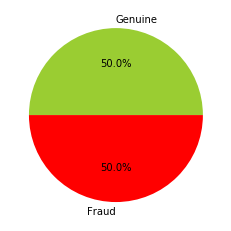

In [21]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
plt.figure(figsize=(8,6))
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(y_resample.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('on')
plt.ylabel('')
plt.show()

In [25]:
X_resample=X_resample.drop('Class',axis=1)

In [26]:
x_Train,x_Test,y_Train,y_Test=train_test_split(X_resample.values,y_resample.values,test_size = 0.2, random_state = 42)

In [27]:
x_Train.shape

(454904, 23)

## Naive Bayes Algorithm

**p(A/B) = p(B/A)*p(A) / p(B)**

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
NBclf=GaussianNB()

In [30]:
NBclf.fit(x_Train,y_Train)

GaussianNB()

In [31]:
NB_pred,NB_pred_prob=NBclf.predict(x_Test),NBclf.predict_proba(x_Test)

In [32]:
NB_precision,NB_recall,_ = precision_recall_curve(y_Test,NB_pred_prob[:,1])

In [33]:
addValues('Naive Bayes',y_Test,NB_pred,NB_pred_prob)

In [34]:
scores['Naive Bayes']

{'precision_score': 0.9731089417260586,
 'recall_score': 0.8555181128896377,
 'f1_score': 0.9105326571212418,
 'AUC_score': 0.9625512620810166,
 'ROC_AUC_score': 0.9515296759931069,
 'kappa': 0.8315823380253482}

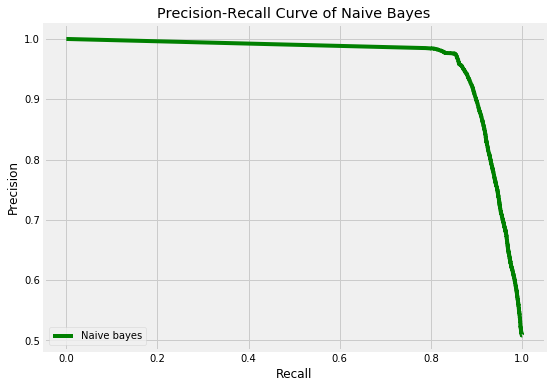

In [35]:
plt.figure(figsize=(8,6))
plt.title('Precision-Recall Curve of Naive Bayes')
plt.plot(NB_recall, NB_precision, label='Naive bayes',color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression(C = 0.01, penalty = 'l2',max_iter=1000)

In [38]:
lr.fit(x_Train, y_Train)

LogisticRegression(C=0.01, max_iter=1000)

In [39]:
lr_pred,lr_prob=lr.predict(x_Test),lr.predict_proba(x_Test)

In [40]:
lr_precision,lr_recall,_ = precision_recall_curve(y_Test,lr_prob[:,1])

In [41]:
addValues("Logistic Regression",y_Test,lr_pred,lr_prob)

In [42]:
scores['Logistic Regression']

{'precision_score': 0.9734541497823803,
 'recall_score': 0.9107167930356641,
 'f1_score': 0.9410409865796155,
 'AUC_score': 0.9894791685438438,
 'ROC_AUC_score': 0.9878626034054682,
 'kappa': 0.8856692156828445}

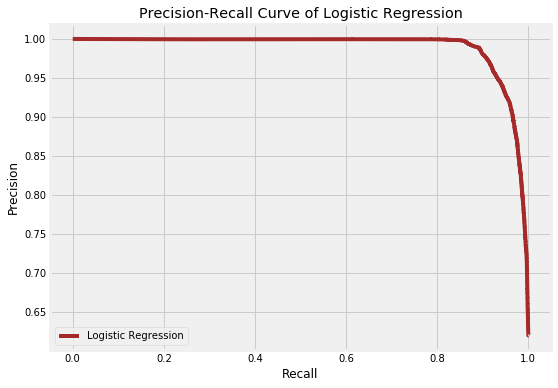

In [43]:
plt.figure(figsize=(8,6))
plt.plot(lr_recall, lr_precision, label='Logistic Regression',color='brown')
plt.title('Precision-Recall Curve of Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

## Linear Discriminant Analysis

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [45]:
lda_clf=LinearDiscriminantAnalysis()

In [46]:
lda_clf.fit(x_Train,y_Train)

LinearDiscriminantAnalysis()

In [47]:
lda_pred, lda_prob = lda_clf.predict(x_Test),lda_clf.predict_proba(x_Test)

In [48]:
lda_precision,lda_recall,_ = precision_recall_curve(y_Test,lda_prob[:,1])

In [49]:
addValues("Linear Discriminant Analysis",y_Test,lda_pred,lda_prob)

In [50]:
scores['Linear Discriminant Analysis']

{'precision_score': 0.9857573211467918,
 'recall_score': 0.8442502106149958,
 'f1_score': 0.9095326784718217,
 'AUC_score': 0.979267322963917,
 'ROC_AUC_score': 0.9773675618267897,
 'kappa': 0.831765763843801}

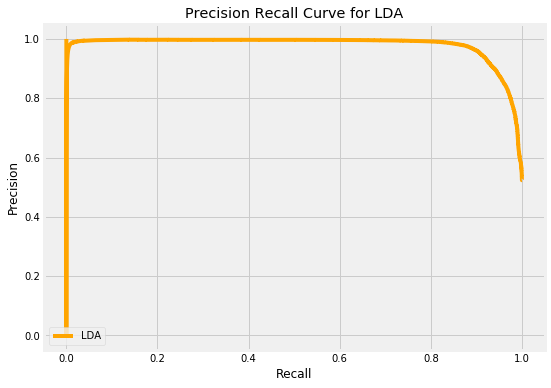

In [51]:
plt.figure(figsize=(8,6))
plt.plot(lda_recall, lda_precision, label='LDA',color='orange')
plt.title('Precision Recall Curve for LDA')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
DT = DecisionTreeClassifier()

In [ ]:
DT.fit(x_Train,y_Train)

In [ ]:
with open('OverSampled/DecisionTree.pkl', 'wb') as fid:
    cPickle.dump(DT, fid)

In [54]:
with open('OverSampled/DecisionTree.pkl', 'rb') as fid:
    DT = cPickle.load(fid)

In [55]:
x_Test.shape

(113726, 23)

In [56]:
DT_preds,DT_probs = DT.predict(x_Test),DT.predict_proba(x_Test)

In [57]:
DT_precision,DT_recall,_ = precision_recall_curve(y_Test,DT_probs[:,1])

In [58]:
addValues("Decision Tree",y_Test,DT_preds,DT_probs)

In [59]:
scores['Decision Tree']

{'precision_score': 0.9975636261656033,
 'recall_score': 0.9988942712721146,
 'f1_score': 0.9982285052794052,
 'AUC_score': 0.9985059302358383,
 'ROC_AUC_score': 0.9982224660325331,
 'kappa': 0.9964475786672696}

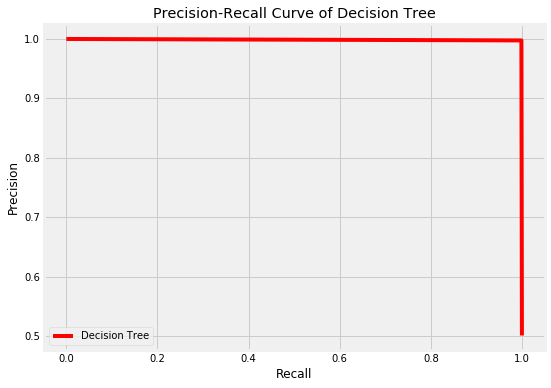

In [60]:
plt.figure(figsize=(8,6))
plt.title('Precision-Recall Curve of Decision Tree')
plt.plot(DT_recall, DT_precision, label='Decision Tree',color='Red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

### Random Forest

### Applying Ensemble techniques

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
RF_clf = RandomForestClassifier()

In [58]:
RF_clf.fit(x_Train, y_Train)

RandomForestClassifier()

In [59]:
with open('OverSampled/RandomForest.pkl', 'wb') as fid:
    cPickle.dump(RF_clf, fid)

In [63]:
with open('OverSampled/RandomForest.pkl', 'rb') as fid:
    RF_clf = cPickle.load(fid)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [64]:
RF_pred,RF_prob = RF_clf.predict(x_Test),RF_clf.predict_proba(x_Test)

In [65]:
RF_precision,RF_recall,_ = precision_recall_curve(y_Test,RF_prob[:,1])

In [66]:
addValues("Random Forest Classifier",y_Test,RF_pred,RF_prob)

In [67]:
scores['Random Forest Classifier']

{'precision_score': 0.9997894293535481,
 'recall_score': 1.0,
 'f1_score': 0.9998947035906075,
 'AUC_score': 0.9999993963086257,
 'ROC_AUC_score': 0.9999994015565097,
 'kappa': 0.999788965541357}

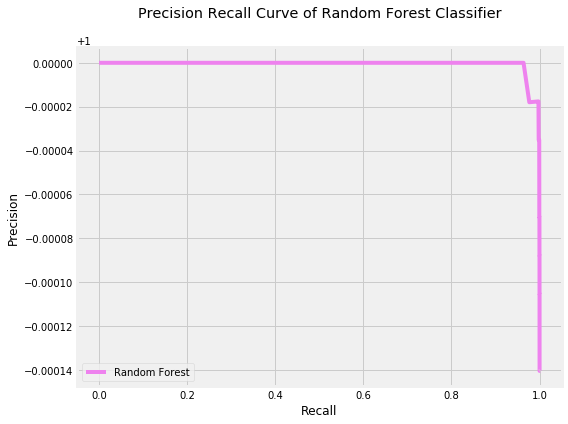

In [68]:
plt.figure(figsize=(8,6))

plt.title('Precision Recall Curve of Random Forest Classifier',pad=30)

plt.plot(RF_recall, RF_precision, label='Random Forest',color='violet')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


### Support Vector Machine

SVM will not be apply to large dataset because if we apply it will run for endless time and will never gets output.

In [70]:
from sklearn.svm import SVC

In [71]:
clf = SVC(kernel="linear",probability=True)

In [ ]:
clf.fit(x_Train,y_Train)

In [ ]:
with open('OverSampled/SVM.pkl', 'wb') as fid:
    cPickle.dump(clf, fid)

In [ ]:
with open('OverSampled/SVM.pkl', 'rb') as fid:
    SVMclf = cPickle.load(fid)

In [ ]:
SVM_pred,SVM_prob=SVMclf.predict(x_Test),SVMclf.predict_proba(x_Test)

In [ ]:
SVM_precision,SVM_recall,_ = precision_recall_curve(y_Test,SVM_prob[:,1])

In [ ]:
addValues("SVM",y_Test,SVM_pred,SVM_prob)

In [ ]:
scores['SVM']

## DNN

In [72]:
import keras
from keras import layers
from keras.models import load_model

In [74]:
model = keras.Sequential([
layers.Dense(input_dim = 23,units= 23, activation = 'relu'),
layers.Dense(units = 20,activation = 'relu'),

layers.Dropout(0.5),

layers.Dense(units = 16,activation = 'relu'),

layers.Dense(units =1, activation = 'sigmoid'),])

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 23)                552       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                480       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,385
Trainable params: 1,385
Non-trainable params: 0
_________________________________________________________________


In [195]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_Train, y_Train, batch_size = 16, epochs = 20)

Epoch 1/20
28432/28432 [==============================] - 26s 900us/step - loss: 0.0449 - accuracy: 0.9846
Epoch 2/20
28432/28432 [==============================] - 25s 894us/step - loss: 0.0188 - accuracy: 0.9947
Epoch 3/20
28432/28432 [==============================] - 26s 919us/step - loss: 0.0143 - accuracy: 0.9963
Epoch 4/20
28432/28432 [==============================] - 26s 915us/step - loss: 0.0125 - accuracy: 0.9968
Epoch 5/20
28432/28432 [==============================] - 25s 893us/step - loss: 0.0113 - accuracy: 0.9972
Epoch 6/20
28432/28432 [==============================] - 26s 931us/step - loss: 0.0100 - accuracy: 0.9976
Epoch 7/20
28432/28432 [==============================] - 26s 902us/step - loss: 0.0098 - accuracy: 0.9976
Epoch 8/20
28432/28432 [==============================] - 26s 920us/step - loss: 0.0089 - accuracy: 0.9979
Epoch 9/20
28432/28432 [==============================] - 27s 942us/step - loss: 0.0090 - accuracy: 0.9980
Epoch 10/20
28432/28432 [============

In [200]:
model.save('OverSampled/first.h5')

In [76]:
model = load_model('OverSampled/first.h5')

In [77]:
Dnn_preds,Dnn_prob= model.predict(x_Test),model.predict_proba(x_Test)

Instructions for updating:
Please use `model.predict()` instead.


In [80]:
DNN_precision,DNN_recall,_ = precision_recall_curve(y_Test,Dnn_prob)

scores.update({'DNN' : {
        'precision_score' : precision_score(y_Test,Dnn_preds.round()),
        'recall_score' : recall_score(y_Test,Dnn_preds.round()),
        'f1_score' : f1_score(y_Test,Dnn_preds.round()),
        'AUC_score': auc(DNN_recall,DNN_precision),
        'ROC_AUC_score': roc_auc_score(y_Test, Dnn_prob),
        'kappa': cohen_kappa_score(y_Test,Dnn_preds.round())
    }})

In [81]:
scores['DNN'] 

{'precision_score': 0.9978632104387425,
 'recall_score': 0.9999473462510531,
 'f1_score': 0.9989041912493097,
 'AUC_score': 0.9997860905454856,
 'ROC_AUC_score': 0.9998388062304928,
 'kappa': 0.9978017161688227}

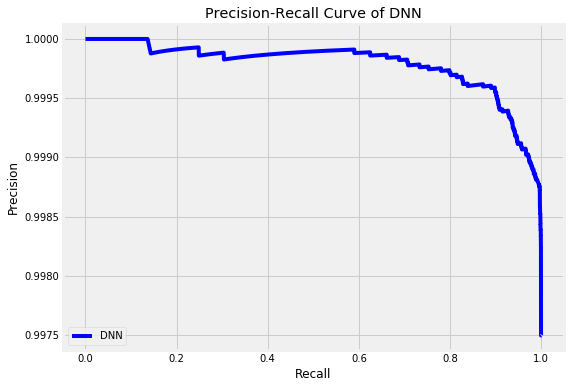

In [82]:
plt.figure(figsize=(8,6))
plt.title("Precision-Recall Curve of DNN")
plt.plot(DNN_recall, DNN_precision, label='DNN',color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

## Conclusion

* By applying SMOTE oversampling technique we got the remarkable increase in performance of all algorithms.

* And Finally concluding statment is that Random Forest Classifier still beats every other algorithm in performance.